# Modèle de nombre de cotisants en fonction du taux de chômage par nombre de travailleurs

In [1]:
from retraites.SimulateurRetraites import SimulateurRetraites
import openturns as ot
import pylab as pl
import scipy as sp
import numpy as np

## Taux de chômage et nombre de cotisants

Soit $\tau_c$ le taux de chômage. Le taux de chômage considéré dans l'hypothèse centrale du modèle du COR est 

$$
\tau_c = 0.045,
$$

c'est à dire 4.5%.

Le taux de chômage $\tau_c$ influence le nombre de cotisants $N_C$, mais le modèle du COR ne permet pas d'exprimer le lien entre $N_C$ et $\tau_c$. 

On fait l'hypothèse que le nombre de cotisants est égal à :

$$
N_C = (1 - \tau_c) N_T,
$$

où $N_T$ est le nombre de cotisants lorsqu'il n'y a aucun chômage, i.e. lorsque $\tau_c = 0$. On pourrait interpréter $N_T$ comme le nombre de travailleurs, c'est-à-dire comme le nombre de personnes participant au marché du travail. Ne sont pas comptés les étudiants sans emploi, les parents restant au foyer pour s'occuper de leurs enfants, et les personnes en âge de travailler qui ont renoncé à chercher un emploi.


Supposons que l'on connaisse le nombre de cotisants $N_C$ pour une valeur donnée du taux de chômage $\tau_c$. On peut alors en déduire le nombre de travailleurs $N_T$ par l'équation : 

$$
N_T = \frac{N_C}{1 - \tau_c}.
$$




## Définition des paramètres

In [2]:
simulateur = SimulateurRetraites()

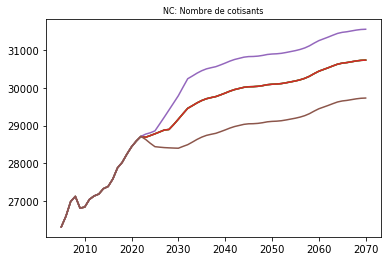

In [3]:
simulateur.graphique("NC")

In [4]:
scenario_central = simulateur.scenario_central

In [5]:
simulateur.scenarios_labels[scenario_central]

'Hausse des salaires: +1,3%/an, Taux de chômage: 7%'

In [6]:
a = 2020 # Année de calcul

In [7]:
NC = simulateur.NC[scenario_central][a]
NC

28439.820040623

In [8]:
TauC = 0.07
NT = NC / (1 - TauC)
NT

30580.45165658387

## Vérification numérique du modèle de chômage en 2070

In [9]:
print("Année:", a)
for s in simulateur.scenarios:
    print(s, simulateur.scenarios_labels[s], ", NC=", simulateur.NC[s][a])

Année: 2020
1 Hausse des salaires: +1,8%/an, Taux de chômage: 7% , NC= 28439.820040623
2 Hausse des salaires: +1,5%/an, Taux de chômage: 7% , NC= 28439.820040623
3 Hausse des salaires: +1,3%/an, Taux de chômage: 7% , NC= 28439.820040623
4 Hausse des salaires: +1%/an, Taux de chômage: 7% , NC= 28439.820040623
5 Hausse des salaires: +1,8%/an, Taux de chômage: 4.5% , NC= 28439.820040623
6 Hausse des salaires: +1%/an, Taux de chômage: 10% , NC= 28439.820040623


## Evolution du nombre de cotisants en fonction du taux de chômage en 2070

Dans cette section, nous validons notre modèle de taux de chômage en présentant directement l'évolution du nombre de cotisants en fonction du taux de chômage. Cette validation permet d'observer la linéarité de $N_C$ en fonction de $\tau_c$ pour une année donnée. On considère ici l'année 2070. 

In [25]:
a = 2070

In [26]:
table_tauxChomage = [4.5, 7.0, 10.0]
table_tauxChomage

[4.5, 7.0, 10.0]

In [27]:
scenario_central = simulateur.scenario_central
scenario_optimiste = simulateur.scenario_optimiste
scenario_pessimiste = simulateur.scenario_pessimiste
scenarios = [scenario_optimiste, scenario_central, scenario_pessimiste]
table_cotisants = [simulateur.NC[s][a] for s in scenarios]
table_cotisants

[31549.246068114, 30732.631943356, 29729.764594685]

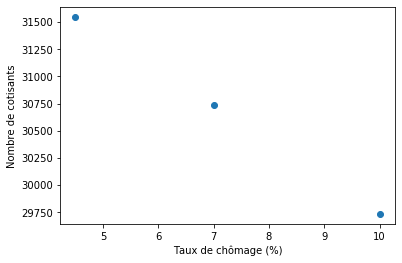

In [28]:
pl.plot(table_tauxChomage, table_cotisants, "o");
pl.xlabel("Taux de chômage (%)");
pl.ylabel("Nombre de cotisants");

On observe visuellement que la relation est bien linéaire entre le nombre de cotisants et le taux de chômage. 

In [29]:
NC = simulateur.NC[scenario_central][a]
NC

30732.631943356

In [30]:
TauC = 0.07
NT = NC / (1 - TauC)
NT

33045.84079930753

In [31]:
TauC = np.linspace(4.5, 10.0)
NC_simple = [(1 - t / 100.0) * NT for t in TauC]

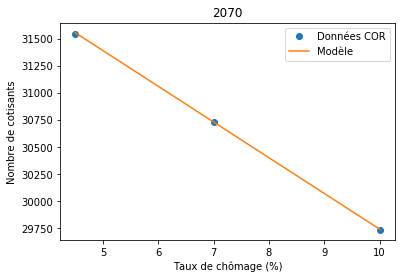

In [32]:
pl.title(a)
pl.plot(table_tauxChomage, table_cotisants, "o", label = "Données COR");
pl.plot(TauC, NC_simple, "-", label = "Modèle");
pl.xlabel("Taux de chômage (%)");
pl.ylabel("Nombre de cotisants");
pl.legend();

On observe que le modèle fonction sur le nombre de travailleurs permet de correctement prédire le nombre de cotisants en fonction du nombre de travailleurs. 

Comparons le nombre de cotisants prédit par notre modèle et celui prévu par le COR dans le scénario pessimiste.

In [36]:
TauC = 4.5
modele_chomage = (1 - TauC / 100.0) * NT
modele_chomage

31558.77796333869

In [37]:
modele_COR = simulateur.NC[scenario_optimiste][a]
modele_COR

31549.246068114

In [38]:
modele_chomage - modele_COR

9.531895224688924

On remarque toutefois une différence numérique pour le taux de chômage égaux à 4.5%, inférieur à une dizaine de cotisants. Toutefois, cette différence numérique est négligeable par rapport à l'objectif poursuivi et c'est la raison pour laquelle nous conservons notre modèle pour le moment. 

## Calcul de la trajectoire du nombre de travailleurs

In [18]:
NT = dict()
for s in simulateur.scenarios:
    print(simulateur.scenarios_labels[s])
    TauC = simulateur.scenarios_chomage[s]
    NT[s] = dict()
    for a in simulateur.annees_futures:
        if (a <= 2020):
            NT[s][a] = simulateur.NC[s][a] # TODO : corriger
        else:
            NT[s][a] = simulateur.NC[s][a] / (1 - TauC / 100.0)

Hausse des salaires: +1,8%/an, Taux de chômage: 7%
Hausse des salaires: +1,5%/an, Taux de chômage: 7%
Hausse des salaires: +1,3%/an, Taux de chômage: 7%
Hausse des salaires: +1%/an, Taux de chômage: 7%
Hausse des salaires: +1,8%/an, Taux de chômage: 4.5%
Hausse des salaires: +1%/an, Taux de chômage: 10%


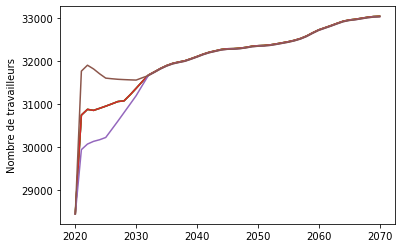

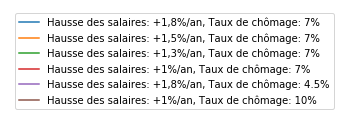

In [19]:
pl.figure()
for s in simulateur.scenarios:
    y = [NT[s][a] for a in simulateur.annees_futures]
    pl.plot(simulateur.annees_futures, y)
pl.ylabel("Nombre de travailleurs")
simulateur.dessineLegende()

On observe que le modèle est correct pour la période 2035 à 2070, mais faux pour la période 2020 à 2035 : nous devrions obtenir une seule courbe alors qu'on obtient trois courbes séparées.  

## Conclusion

Nous avons vu que le modèle de prédiction du nombre de cotisants en fonction du taux de chômage pourrait être fondé sur le calcul du nombre de travailleurs dans le scénario central associé à un taux de chômage de 7%. Ce modèle permet de correctement retrouver le nombre de cotisants dans les scénarios optimistes (taux de chômage égal à 4.5%)  et pessimistes (taux de chômage égal à 10%) pour la période de 2035 à 2070. Toutefois, ce modèle ne permet pas de retrouver les données du COR pour la période de 2020 à 2035.  